In [ ]:
import sys
import os 
from pathlib import Path

rootfolder = os.path.abspath(os.path.join(Path.cwd(),"..")) # rootpath --> top of git repo
# Change the above if you are not in $root/notebook/
sys.path.append(os.path.join(rootfolder))

from src.data.data_loader import load_data
import src.utility.ut_visualization as ut_vs
import src.utility.ut_general as ut_general

datafolder = os.path.join(rootfolder, "data")

Some quick check for both train and test dataset 

In [5]:
# Load trainning data: 
train_data_dic = load_data(datafolder, filetype = "train") 
train_quant = train_data_dic["train_quant"]
train_outcome = train_data_dic["train_outcome"]
train_cate = train_data_dic["train_cate"]
train_fmri = train_data_dic["train_fmri"] 

In [6]:
# Load test data: 
test_data_dic = load_data(datafolder, filetype = "test")
test_quant = test_data_dic["test_quant"]
test_cate = test_data_dic["test_cate"]
test_fmri = test_data_dic["test_fmri"]

In [7]:
print(train_fmri.shape) 
print(train_fmri.head)

(1213, 19901)
<bound method NDFrame.head of      participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0      70z8Q2xdTXM3          0.093473          0.146902          0.067893   
1      WHWymJu6zNZi          0.029580          0.179323          0.112933   
2      4PAQp1M6EyAo         -0.051580          0.139734          0.068295   
3      obEacy4Of68I          0.016273          0.204702          0.115980   
4      s7WzzDcmDOhF          0.065771          0.098714          0.097604   
...             ...               ...               ...               ...   
1208   kTurROKp5YHQ          0.022932          0.024830         -0.006514   
1209   FCRyMz9O6yCq          0.047078          0.135955          0.144366   
1210   vm2P1hmAY1hl          0.094541          0.145280          0.061964   
1211   OFxvN8lnw21w         -0.001533          0.128562          0.045000   
1212   9gpepMI9sj5q         -0.115224          0.147713          0.083183   

      0throw_4thcolumn  0throw_

There are 1213 patients. 19901 - 1 columns shows the functional connectivity values between pairs of brain regions (200 regions in total). Based on my understanding, there are multiple regions in brains. Each column in the dataset represents how those regions connects with each other. Positive value means the brain regions are functionally connected (they activate together). Negative regions means brain regions are anti-correlated regions (one activates while the other deactivates). Near-zero values means no strong functional relationship.

In [ ]:
train_fmri_summary = train_fmri.describe() 

       0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  0throw_4thcolumn  \
count       1213.000000       1213.000000       1213.000000       1213.000000   
mean           0.060553          0.122315          0.060268          0.041287   
std            0.064178          0.054026          0.057495          0.043491   
min           -0.183279         -0.059932         -0.145566         -0.127827   
25%            0.018482          0.086102          0.026548          0.014457   
50%            0.058276          0.123220          0.061339          0.043246   
75%            0.100103          0.154518          0.099056          0.068408   
max            0.321522          0.390895          0.278429          0.189825   

       0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  0throw_8thcolumn  \
count       1213.000000       1213.000000       1213.000000       1213.000000   
mean           0.069722          0.091007          0.066852          0.000252   
std            0.044222    

In [15]:
print(train_fmri_summary.index) # Stats types in df.describe() 
for row in train_fmri_summary.index[1:]: # skip counts since it is always 1213
    ut_general.check_connect_in_summary_stats(train_fmri_summary, row)


Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')
Columns with highest connectivity mean values:  26throw_129thcolumn     0.326986
14throw_15thcolumn      0.232287
115throw_117thcolumn    0.218824
18throw_121thcolumn     0.212151
96throw_194thcolumn     0.206330
1throw_103thcolumn      0.205470
73throw_182thcolumn     0.202919
120throw_121thcolumn    0.173731
19throw_122thcolumn     0.173404
81throw_186thcolumn     0.165437
Name: mean, dtype: float64
Columns with lowest connectivity mean values:  1throw_7thcolumn       -0.031934
19throw_112thcolumn    -0.031539
73throw_193thcolumn    -0.027431
13throw_122thcolumn    -0.026618
112throw_122thcolumn   -0.025405
151throw_183thcolumn   -0.025171
103throw_106thcolumn   -0.024972
1throw_6thcolumn       -0.024692
50throw_162thcolumn    -0.024393
61throw_86thcolumn     -0.024043
Name: mean, dtype: float64
Columns with highest connectivity std values:  55throw_143thcolumn     0.098153
159throw_177thcolumn    0.09

In [10]:
print(test_fmri.shape) 

(304, 19901)


The test dataset has 304 participates. 

In [11]:
test_fmri_summary = test_fmri.describe() 

In [16]:
print(test_fmri_summary.index)
for row in test_fmri_summary.index[1:]:
    ut_general.check_connect_in_summary_stats(test_fmri_summary, row)

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')
Columns with highest connectivity mean values:  9throw_108thcolumn     0.813280
96throw_194thcolumn    0.794468
26throw_129thcolumn    0.791315
76throw_185thcolumn    0.766086
81throw_186thcolumn    0.762251
7throw_9thcolumn       0.758799
71throw_180thcolumn    0.755745
7throw_106thcolumn     0.751816
9throw_109thcolumn     0.750291
10throw_110thcolumn    0.745769
Name: mean, dtype: float64
Columns with lowest connectivity mean values:  76throw_167thcolumn    -0.349344
74throw_167thcolumn    -0.331195
167throw_185thcolumn   -0.321430
78throw_167thcolumn    -0.318888
42throw_185thcolumn    -0.316703
74throw_140thcolumn    -0.305533
74throw_146thcolumn    -0.305525
87throw_134thcolumn    -0.304318
145throw_185thcolumn   -0.299901
74throw_145thcolumn    -0.298863
Name: mean, dtype: float64
Columns with highest connectivity std values:  159throw_177thcolumn    0.388346
80throw_177thcolumn     0.364669
70thr

I don't understand. Why the range between test and train datasets vary hugely??? 

This dramatic difference in connectome between train and test datset made me worried if the data of test and train were processed in the same way? It is intereating since even stardard deviation in the test dataset is higher than the train dataset in general. 

Maybe both datasets got normalized or got some processed before and they are not processed the same. 

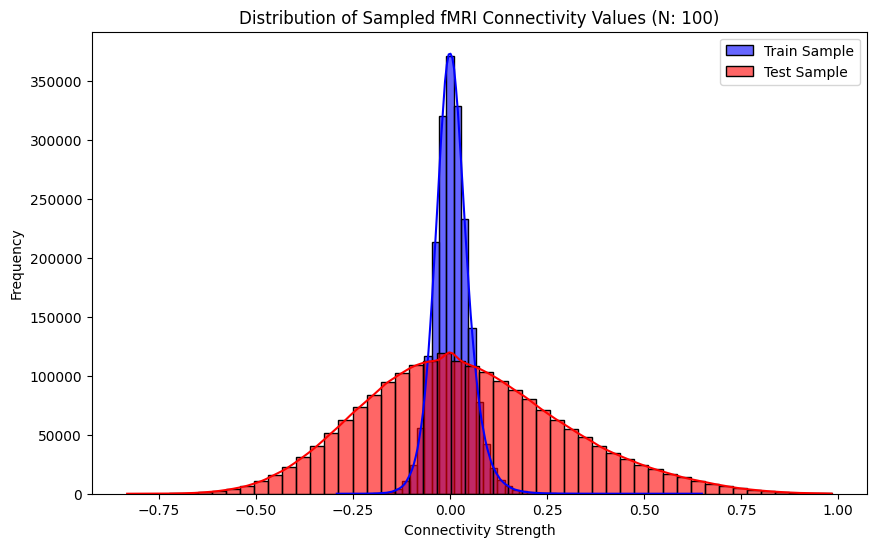

In [13]:
# Let's check a histogram of some potential values in the connectome dataset 

# Randomly select 'proportion' * 19900 * num of participates --> Dataset too large to plot the whole
ut_vs.plot_histogram_with_randomly_sampled_N(train_fmri, test_fmri, 100) 

Why??? Why the train dataset has a much narrower distribution :(